In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [5]:
url='C:/Users/Asus/Desktop/python/with elias vaia/Admission_Predict.csv'
df=pd.read_csv(url)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


#### Find Correlation

In [6]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [7]:
df.shape

(400, 9)

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


#### null value detemination

In [9]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Heatmap

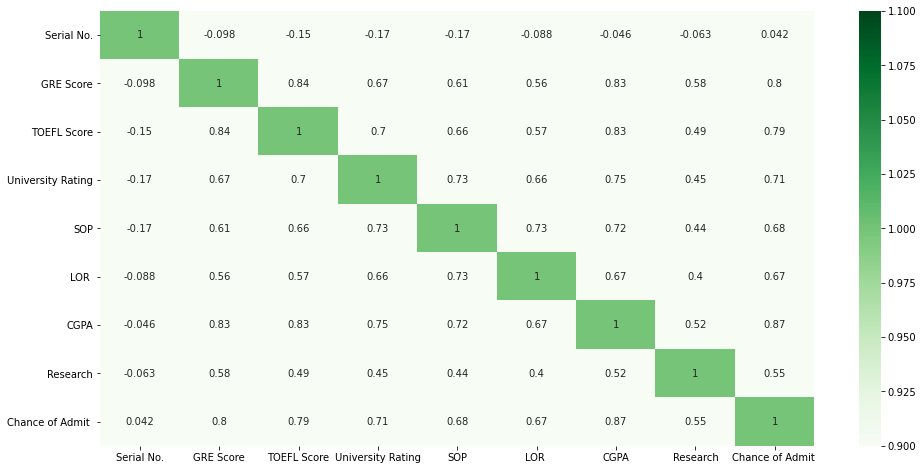

In [11]:
correlation = df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True, linewidths=0,vmin=1,cmap='Greens')
plt.show()

#### Column Rename

In [12]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)
df.drop(labels='Serial No.', axis=1, inplace=True)

#### Average chane of admit

In [13]:
avgCA=df.groupby('CGPA')['Chance of Admit'].mean()
avgCA

CGPA
6.80    0.360000
7.20    0.460000
7.25    0.570000
7.28    0.470000
7.30    0.540000
          ...   
9.80    0.956667
9.82    0.960000
9.87    0.970000
9.91    0.970000
9.92    0.970000
Name: Chance of Admit, Length: 168, dtype: float64

#### Distribution Plot

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CGPA vs Chance of Admit')

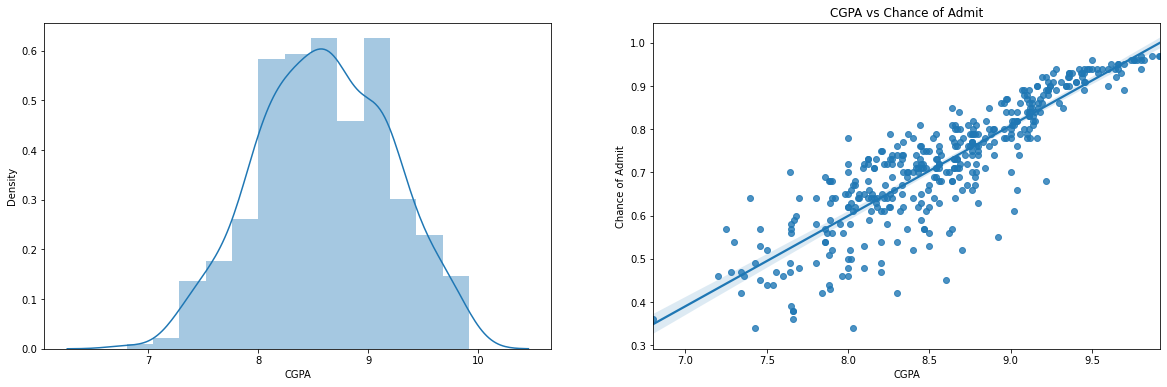

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

#### Max to min rate of chance of admit

In [23]:
df.groupby('CGPA')['Chance of Admit'].mean().sort_values(ascending=False)

CGPA
9.92    0.970000
9.87    0.970000
9.91    0.970000
9.82    0.960000
9.78    0.960000
          ...   
7.54    0.440000
7.84    0.420000
7.43    0.415000
7.66    0.373333
6.80    0.360000
Name: Chance of Admit, Length: 168, dtype: float64

#### Boxplot

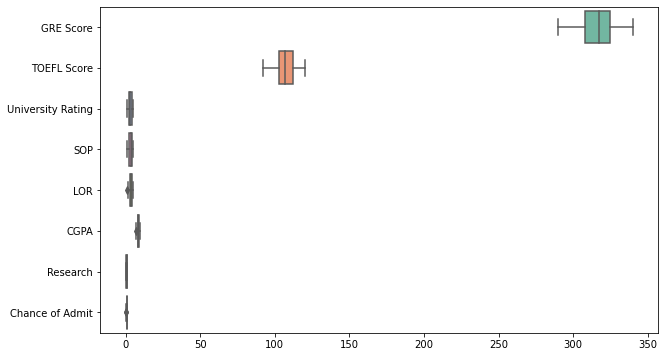

In [24]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

#### Boxplot for CGPA and Chance of Admit

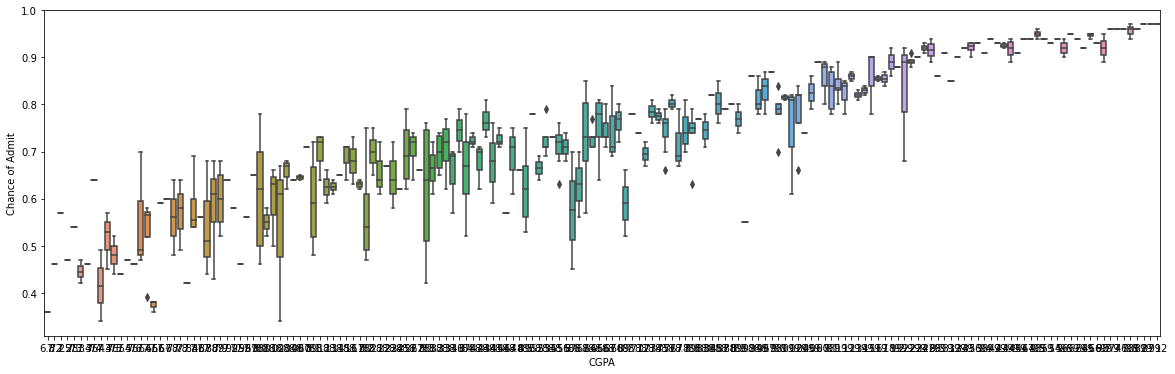

In [25]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x="CGPA", y="Chance of Admit", data=df)

#### Histogram

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR'}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

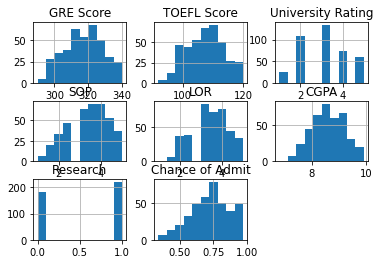

In [26]:
df.hist()

#### Pair plot

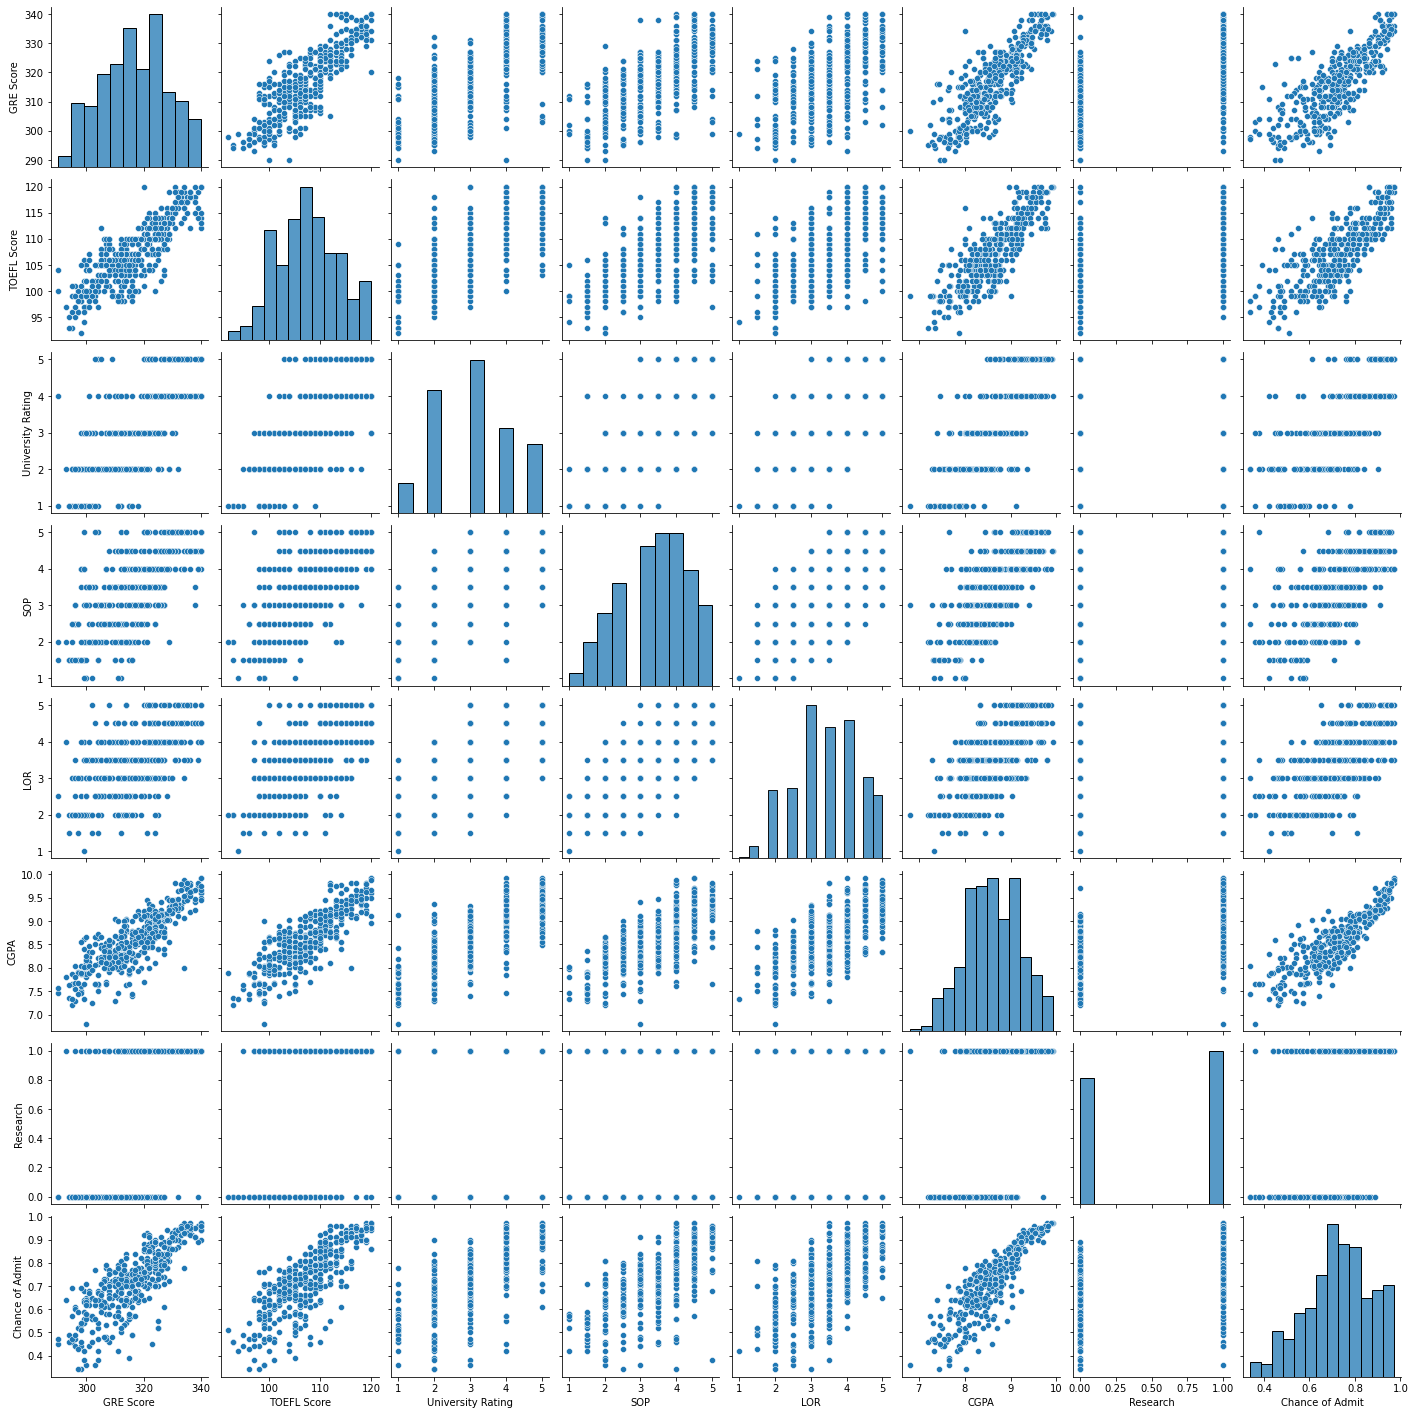

In [27]:
sns.pairplot(df)

#### Reg plot

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CGPA vs Chance of Admit')

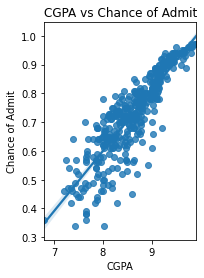

In [38]:
plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

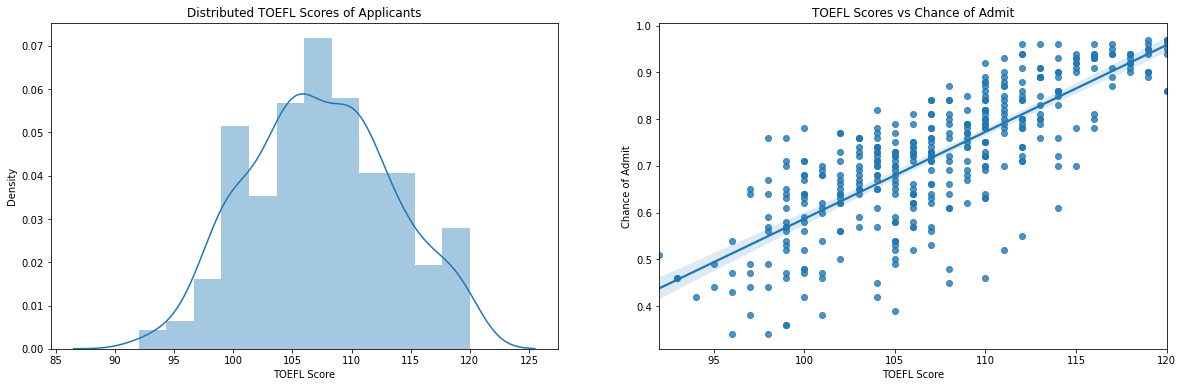

In [48]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL Score'], df['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admit')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

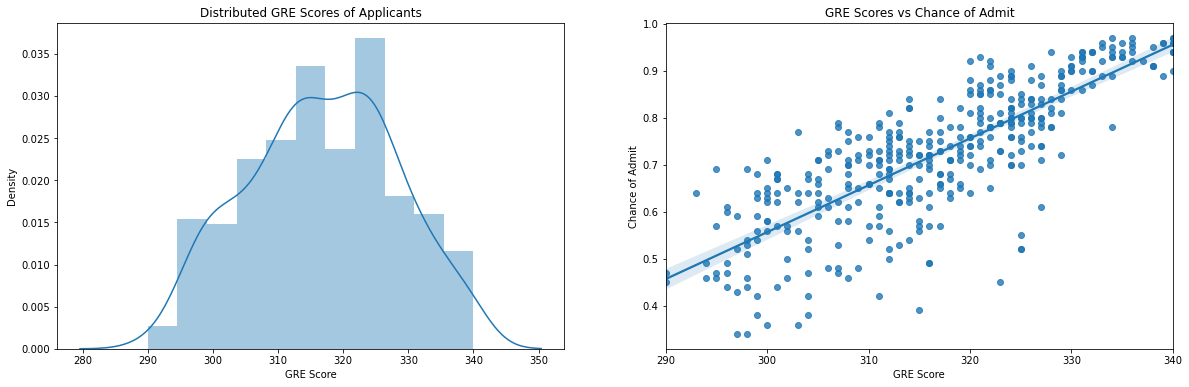

In [49]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')
plt.subplot(1,2,2)
sns.regplot(df['GRE Score'], df['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admit')

#### Joint plot

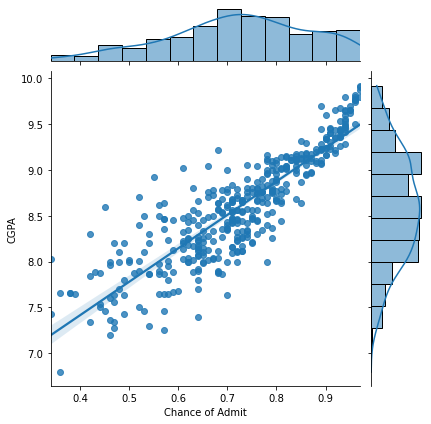

In [39]:
ax = sns.jointplot(x="Chance of Admit", y="CGPA", kind="reg", data=df)

#### Time series plot

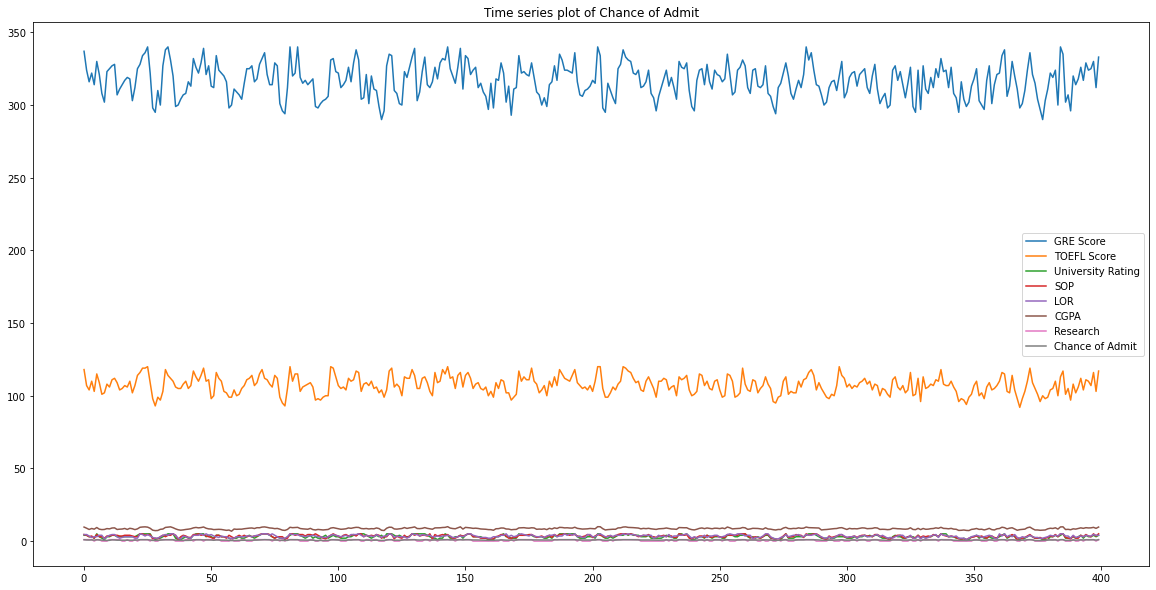

In [40]:
df.plot(figsize=(20,10))
plt.title("Time series plot of Chance of Admit")
plt.show()

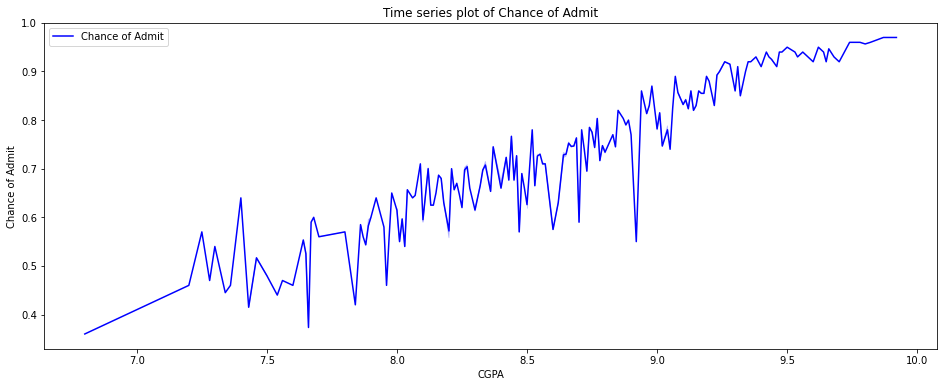

In [41]:
plt.figure(figsize=(16, 6))
plt.title('Time series plot of Chance of Admit')
ax = sns.lineplot(x="CGPA", y="Chance of Admit",ci=10,color="blue", label="Chance of Admit",data=df)

#### Count plot

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'No Research Experience'), Text(1, 0, 'Has Research Experience')]

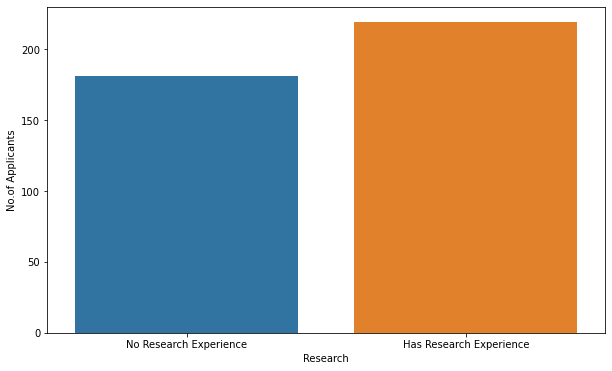

In [55]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(df["Research"])
plt.ylabel("No.of Applicants")
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Applicants')

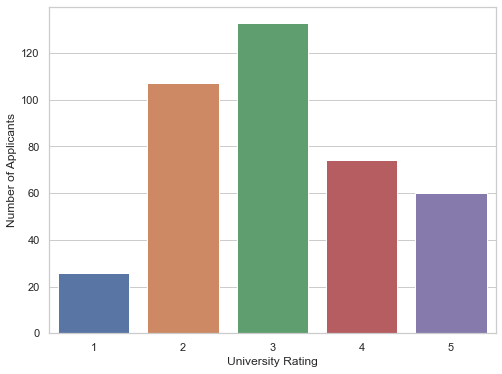

In [65]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.ylabel('Number of Applicants')
